In [24]:
from glob import glob
import shutil
from PIL import Image
import os
from random import shuffle
from tqdm import tqdm
import cv2
import numpy as np
def createDirectory(directory):
    """_summary_
        create Directory
    Args:
        directory (string): file_path
    """    
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print("Error: Failed to create the directory.")


In [23]:
import matplotlib.pyplot as plt
img=cv2.imread('../../data/normalization_type/NIA6_R_BRDC_BRCA-AJ-00158-S-TP-02_42_20.jpeg')
mask=np.zeros((img.shape[0],img.shape[1]),dtype=np.uint8)
mask=np.where(img.std(axis=2)<3,255,0)
Image.fromarray(mask.astype(np.uint8)).save('../../data/normalization_type/NIA6_R_BRDC_BRCA-AJ-00158-S-TP-02_42_20_mask.jpeg')


In [3]:
file_list=glob('../../data/origin_type/**/**/*.jpeg')
save_list=[f.replace('/origin_type', '/Image_down/origin') for f in file_list]
for j in tqdm(range(len(file_list))):
    createDirectory(os.path.dirname(save_list[j]))
    shutil.copy(file_list[j],save_list[j])

100%|██████████| 15970/15970 [07:59<00:00, 33.33it/s]


In [13]:
file_list=glob('../../data/synth/json/**/**/*.jpeg')
save_list=[f.replace('/synth/json/_', '/Image_down/synth/') for f in file_list]
shuffle(save_list)
for j in tqdm(range(15970)):
    createDirectory(os.path.dirname(save_list[j]))
    shutil.copy(file_list[j],save_list[j])

100%|██████████| 15970/15970 [02:30<00:00, 106.37it/s]


In [55]:
carcinoma='STMX'
Refined_file_list=glob('../../data/origin_type/'+carcinoma+'/**/*.jpeg')
Refined_wsi_list=list(set([os.path.basename(f).split('_')[3] for f in Refined_file_list]))
Whole_file_list=glob('../../data/NIA/'+carcinoma+'/*.jpeg')
Whole_wsi_list=list(set([os.path.basename(f).split('_')[3] for f in Whole_file_list]))
print(len(Whole_wsi_list),len(Refined_wsi_list),len(Whole_file_list),len(Refined_file_list))

66 93 31010 1464


In [25]:
path_list=glob('../../result/synth/**/**/*.jpeg')
for i in range(len(path_list)):
    file_name=path_list[i].replace('/result/synth/','/result/synth_1/')
    shutil.move(path_list[i],file_name)
    

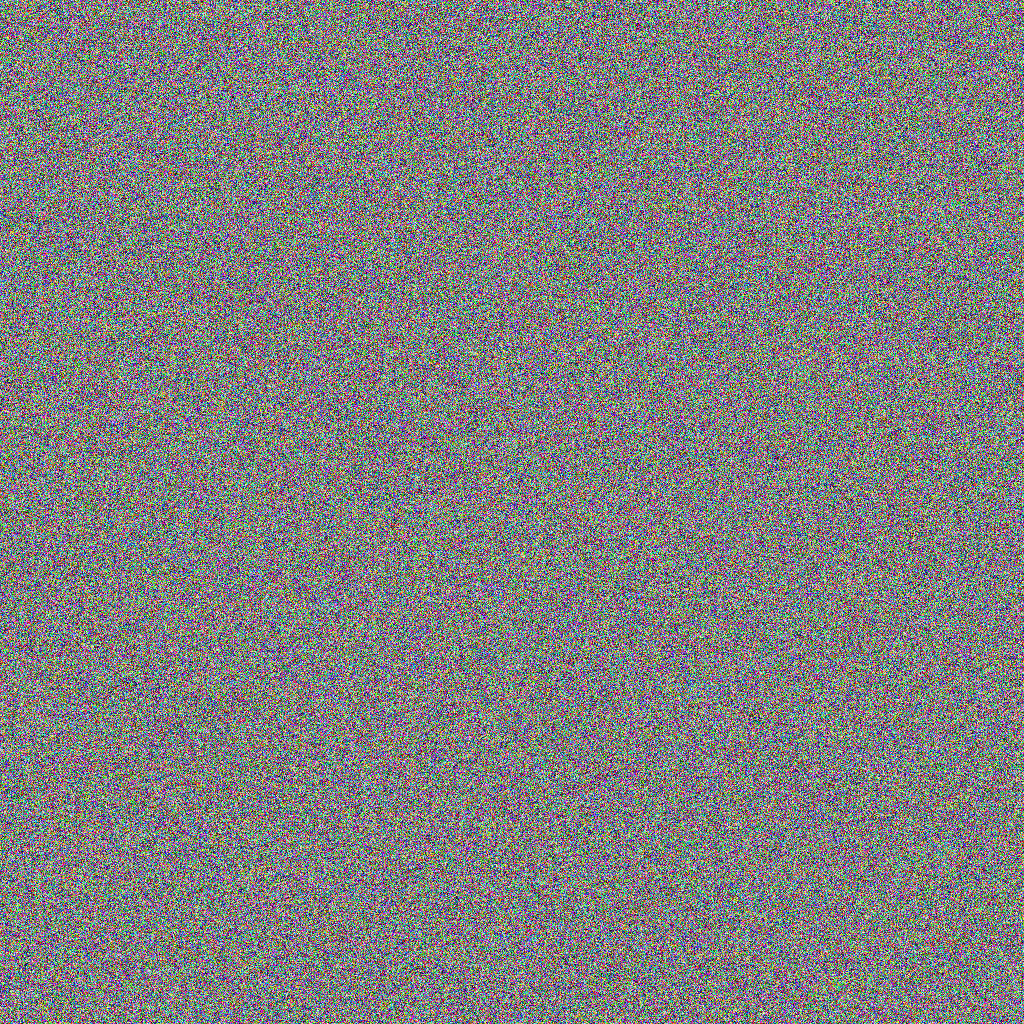

In [58]:
import torch
import torchvision
topilimage = torchvision.transforms.ToPILImage()
topilimage(torch.randn((3,1024,1024)))